# Maximum and minimum temperatures by day

This is an example of making a (useful?) plot using the functions contained in GetDataFrame.R and the ggplot2 plotting system. 

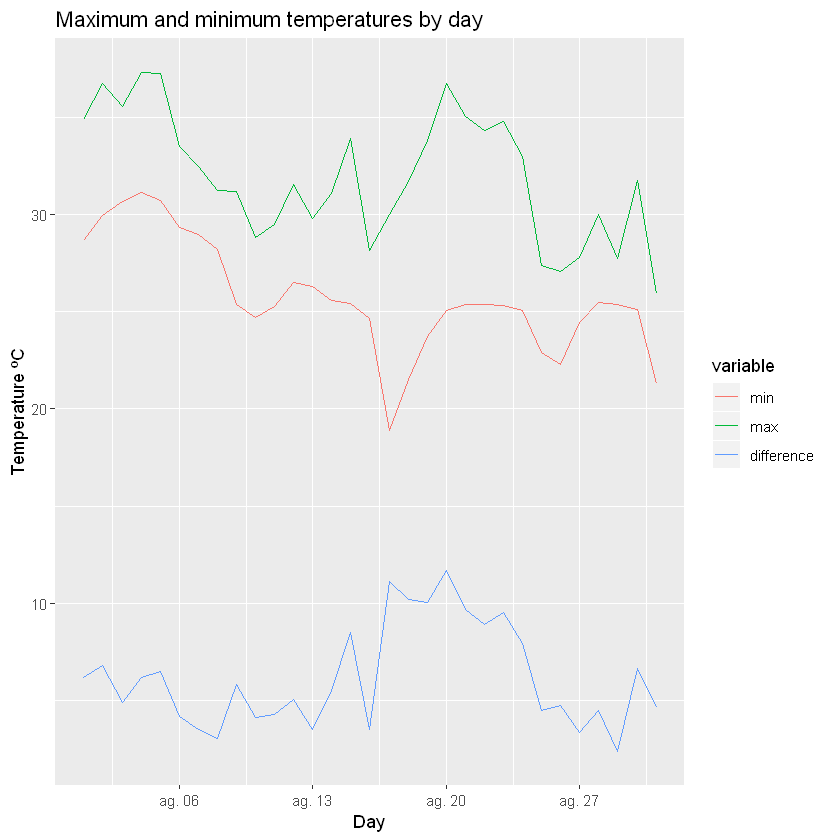

In [56]:
library(ggplot2)
library(dplyr)
library(reshape)

#+
# This source file contains functions to extract dataframes from the
# hdf5 files
#-
source('GetDataFrame.R')

#+
# Read dataframe from hdf5, use dplyr select() to get just time and temperature
#-
rawds <- getRawDF("../data/monthly-201808.hdf5") %>% select(time,temperature)

#+
# Truncate timestamp to days, summarize by time gettting the 
# minimum and maximum temperatures. Add a difference column
#-
rawds <-  rawds %>% mutate(time=as.POSIXct(trunc(time,"day"))) %>%
          group_by(time) %>% 
          summarise(min=min(temperature), max=max(temperature)) %>%
          mutate(difference=max-min)
#+
# Change the 'time' column name to 'date'
#
colnames(rawds) <- c('date','min','max','difference')

#+
# Melt (stack) the dataframe by date. The casting is necessary because
# melt() does not like dplyr manipulated dataframes
#-
meltds <- melt(as.data.frame(rawds),id='date')

#+
# Display the plot
#-
ggplot(meltds) + geom_line(aes(x=date, y=value, color=variable)) +
        labs(x="Day",y="Temperature ºC", title="Maximum and minimum temperatures by day")

